<a href="https://colab.research.google.com/github/Chaithra-Angadi/Quantative-Research/blob/main/Quantative_Research1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [19]:
from google.colab import files
uploaded = files.upload()

Saving your_file.csv to your_file (1).csv


In [20]:
df = pd.read_csv("your_file.csv")

In [21]:
df['Dates'] = pd.to_datetime(df['Dates'])

/tmp/ipython-input-21-2452315616.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [22]:
print(df.head())

       Dates  Prices
0 2020-10-31    10.1
1 2020-11-30    10.3
2 2020-12-31    11.0
3 2021-01-31    10.9
4 2021-02-28    10.9


In [23]:
df = df.sort_values('Dates')

In [24]:
print(df.head())

       Dates  Prices
0 2020-10-31    10.1
1 2020-11-30    10.3
2 2020-12-31    11.0
3 2021-01-31    10.9
4 2021-02-28    10.9


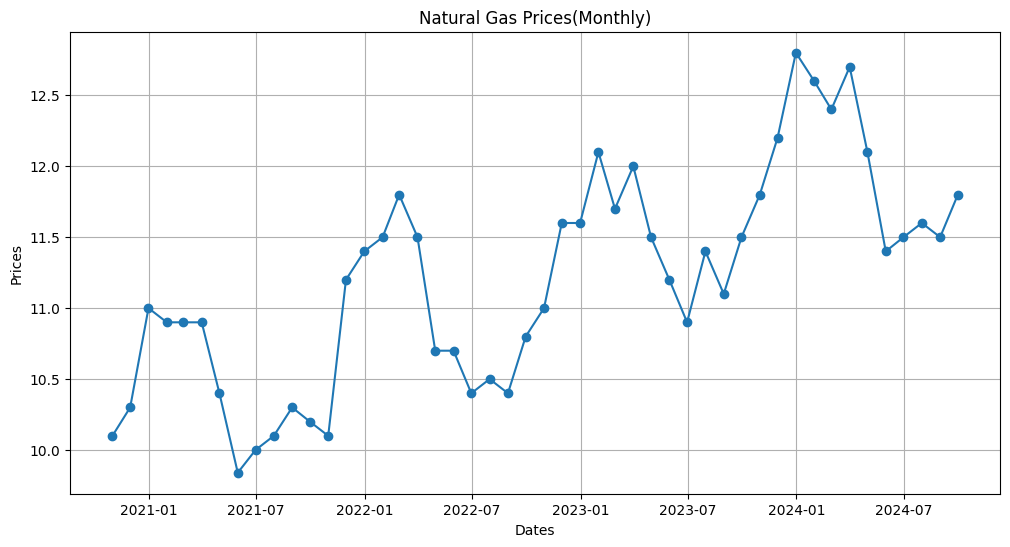

In [25]:
#Plot the data
plt.figure(figsize =(12,6))
plt.plot(df['Dates'],df['Prices'],marker = 'o')
plt.title("Natural Gas Prices(Monthly)")
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.show()

In [26]:
#Converting dates to numeric
df['Days_Since_Start'] = (df['Dates'] - df['Dates'].min()).dt.days
X = df['Days_Since_Start']
y = df['Prices']

In [27]:
model = LinearRegression()
model.fit(X.values.reshape(-1,1),y)

LinearRegression()

In [29]:
#predict price for any date
def predict_price(date_str):
    input_date = pd.to_datetime(date_str)
    Days_Since_Start = (input_date - df['Dates'].min()).days
    price = model.predict([[Days_Since_Start]])
    return round(price[0],2)

In [33]:
#Predict Future Prices
future_dates = pd.date_range(start = df['Dates'].min(), periods = 60,freq = 'M')
future_days = (future_dates - df['Dates'].min()).days
future_prices = model.predict(np.array(future_days).reshape(-1,1))


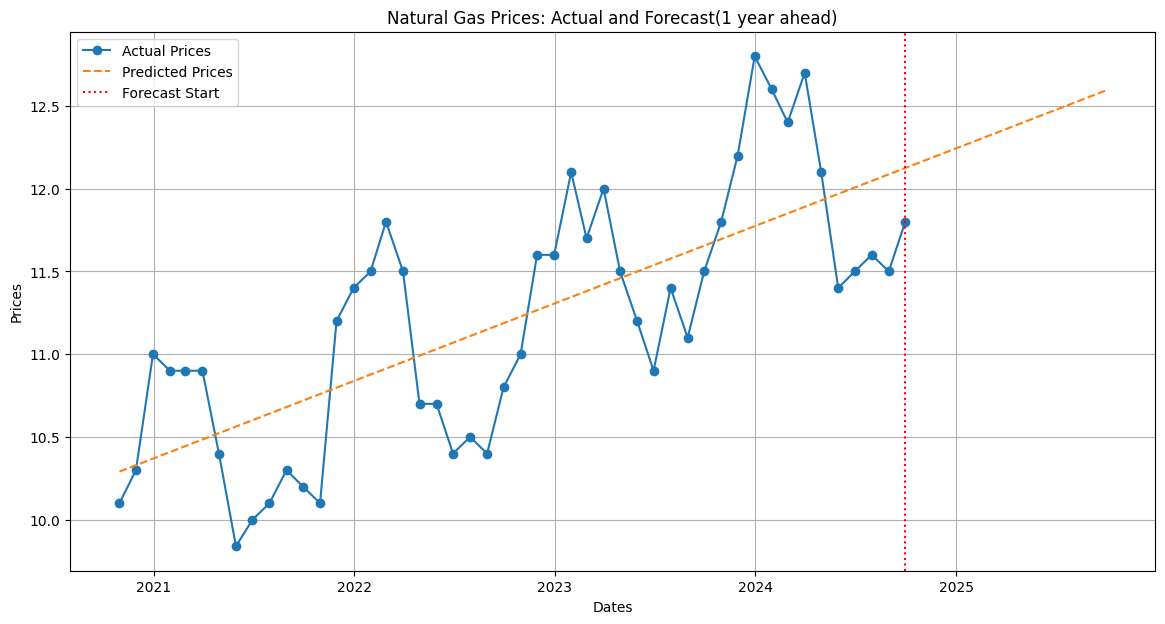

In [57]:
#Plotting Actual and Predict Prices
plt.figure(figsize = (14,7))
plt.plot(df['Dates'],df['Prices'],label = 'Actual Prices', marker = 'o')
plt.plot(future_dates,future_prices,label = 'Predicted Prices', linestyle = '--')
plt.axvline(df['Dates'].max(), color = 'red', linestyle = ':', label = 'Forecast Start')
plt.title('Natural Gas Prices: Actual and Forecast(1 year ahead)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
print(np.array(future_dates).shape)

(60,)


In [47]:
print(np.array(predict_price).shape)

()


In [55]:
print(len(future_prices))

60


In [58]:
#Test Predictions
print('Price on 2026-01-01',predict_price('2026-01-01'))
print('Price on 2026-11-01',predict_price('2026-11-01'))


Price on 2026-01-01 12.71
Price on 2026-11-01 13.1
